# 12	Regression mehrdimensionaler Datensätze
# 12.2	Lebensdauer von Maschinenkomponenten

a) Nach der Initialisierung werden die Daten eingelesen.  Mithilfe des Befehls "ols" wird eine Regressionsfunktion für ein vollquadratisches Modell berechnet und das Ergebnis grafisch dargestellt. Mit dem MATLAB-Code

In [1]:
import scipy
from scipy import io
from scipy import stats
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
""" Laden der Daten"""
values=scipy.io.loadmat('LebensdauerMaschinenkomponenten.mat')['values']

T=values[:,0]
U=values[:,1]
D=values[:,2]


In [23]:
''' Statistische Bewertung '''
'''"""[0 0; 1 0; 0 1; 1 1; 2 0; 0 2] Vollquadratisches Modell anlegen""" '''
# Model: T = b(1) + b(2)*U + b(3)*D + b(4)*U*D + b(5)*U^2 + b(6)*D^2
data_Dic={'X':U, 'Y':D, 'Z':T}
 
model = ols("Z ~ X + Y + X*Y + I(X**2)+ I(Y**2)" , data_Dic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     14.43
Date:                Mon, 06 Jan 2020   Prob (F-statistic):             0.0115
Time:                        20:40:40   Log-Likelihood:                -40.807
No. Observations:                  10   AIC:                             93.61
Df Residuals:                       4   BIC:                             95.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6196.8696   2635.887     -2.351      0.0

ergibt sich folgende Darstellung:


<IPython.core.display.Javascript object>


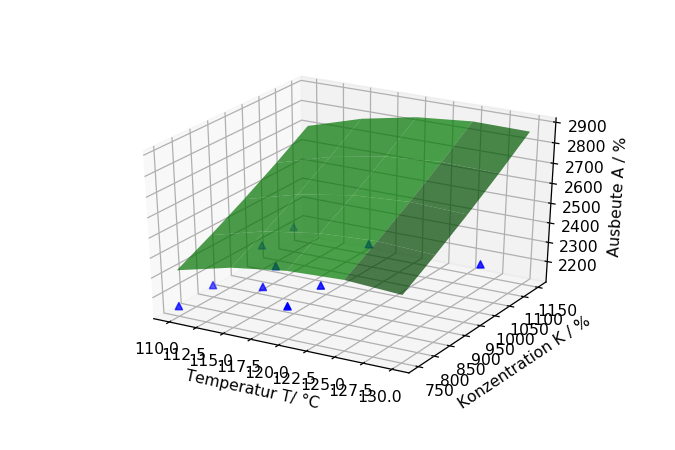

Text(0.5, 0, 'Ausbeute A / %')

In [24]:
#%matplotlib notebook
#b1,b2,b3,b4,b5,b6=-6.5712*1000,0.1434683*1000,-0.5417,0.0070, -0.5993, 0.000019349
b1,b2,b3,b4,b5,b6=list(model._results.params)

'''% Regressionsfunktion als Grid berechnen'''
uplot= np.arange(110,135,5)
dplot=np.arange(750,1250,100)
Uplot,Dplot = np.meshgrid(uplot, dplot)
Tplot = b1 + b2*Uplot + b3*Dplot + b4*Uplot*Dplot + b5*(Uplot**2) + b6*(Dplot**2)

print ('ergibt sich folgende Darstellung:')

'''Grafische Darstellung'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Uplot,Dplot,Tplot,color='g', alpha=0.7)
ax.scatter(U, D, T ,c='b', marker='^')
ax.set_xlabel('Temperatur T/ °C') 
ax.set_ylabel('Konzentration K / %') 
ax.set_zlabel('Ausbeute A / %')  

b) Die Residuen ergeben sich aus der Abweichung von Messwert zu Regressionswert. Sie wer-den direkt von der Funktion regstats übernommen.

Text(0, 0.5, 'Residuen')

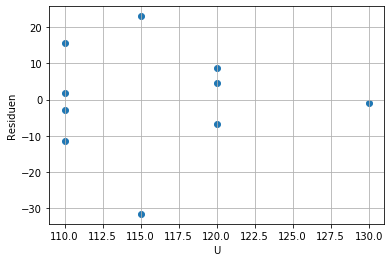

In [25]:
%matplotlib inline
plt.scatter(U,model.resid)
plt.grid(True)
plt.xlabel('U')
plt.ylabel('Residuen')

Text(0, 0.5, 'Residuen')

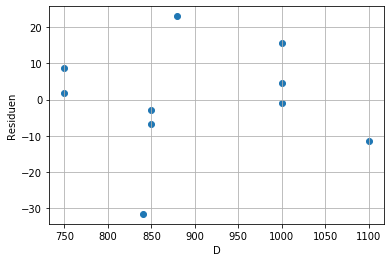

In [26]:
%matplotlib inline
plt.scatter(D,model.resid)
plt.grid(True)
plt.xlabel('D')
plt.ylabel('Residuen')

Es ist keine Struktur der Reststreuung zu erkennen, die auf einen systematischen Regressionsfehler schließen lässt.

c) Zur Bewertung der Güte wird das adjungierte Bestimmtheitsmaß herangezogen.

Es beträgt RADJ = 0.882, was auf eine mäßige Regression hinweist. Die Residuen lassen aber, wie in Aufgabenteil b festgestellt, keinen strukturierten Fehler erkennen. Der t-Test zeigt, dass nicht alle Terme signifikant sind, deshalb wird in der folgende Teilaufgabe eine Reduktion der Regressionsterme vorgenommen.

d) Ausgehend von dem vollquadratischen Modell werden nicht signifikante Terme eliminiert.

In [27]:
'''Reduktion des Modells'''
''' Statistische Bewertung '''
'''"""model = [0 0; 1 0; 0 1; 1 1; 2 0]; anlegen""" '''
# Model: T = b(1) + b(2)*U + b(3)*D + b(4)*U*D + b(5)*U^2 
data_Dic={'U':U, 'D':D, 'T':T}
 
model1 = ols("T ~ U + D + U*D + I(U**2)" , data_Dic).fit()
print(model1.summary())

'''"""model = [0 0; 1 0; 0 1; 2 0]; anlegen""" '''
# Model: T = b(1) + b(2)*U + b(3)*D  + b(5)*U^2 
model2 = ols("T ~ U + D  + I(U**2)" , data_Dic).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      T   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 06 Jan 2020   Prob (F-statistic):            0.00311
Time:                        20:40:46   Log-Likelihood:                -41.578
No. Observations:                  10   AIC:                             93.16
Df Residuals:                       5   BIC:                             94.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6568.1312   2508.313     -2.619      0.0

##### Durch die Reduktion des Regressionsmodells steigt das adjungierte Bestimmtheitsmaß von RADJ = 0.882 auf RADJ = 0.904 an. Anschließend sind alle Terme signifikant.

In [28]:
from scipy.stats import t   
b=model2._results.params 
r=model2.resid

'''Berechnung des Konfidenzbereichs'''
PSI = np.linalg.inv((np.array([np.ones(np.size(U)),U,D,U**2])).dot(np.array([np.ones(np.size(U)),U,D,U**2]).T))
FG = (len(U) - len(b))
Sr = np.sqrt(1/FG*r.dot(r.T))

Tmin=np.zeros((len(Uplot), len(Dplot)))
Tmax=np.zeros((len(Uplot), len(Dplot)))

for n in range(0,len(Uplot)):
    for m in range(0,len(Dplot)):
        x0 = np.array([1, Uplot[n,m], Dplot[n,m], Uplot[n,m]**2])
        Tmin[n,m] = b.dot(x0) - t.ppf(0.975,FG)*Sr*np.sqrt(x0.dot(PSI).dot(x0))
        Tmax[n,m] = b.dot(x0) - t.ppf(0.025,FG)*Sr*np.sqrt(x0.dot(PSI).dot(x0))
        
Tplot = b[0] + b[1]*Uplot + b[2]*Dplot + b[3]*Uplot**2         

Es ergibt sich folgende Darstellung.


<IPython.core.display.Javascript object>


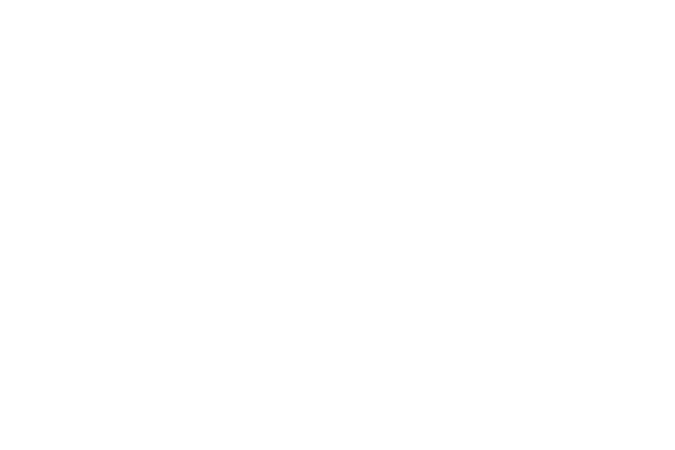

Text(0.5, 0, 'T')

<IPython.core.display.Javascript object>


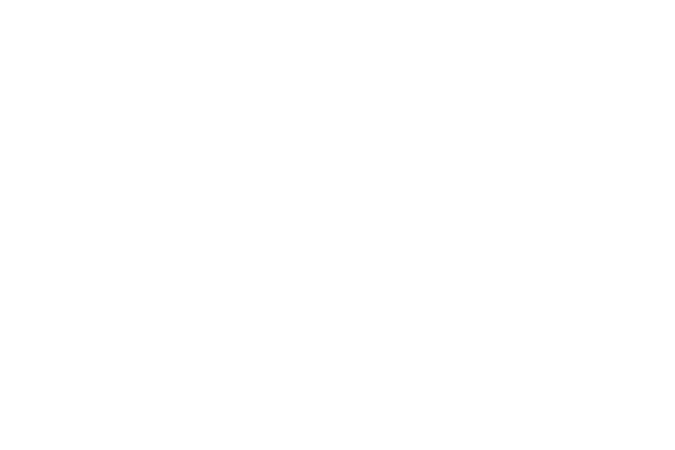

In [29]:
print('Es ergibt sich folgende Darstellung.')
%matplotlib notebook
'''Grafische Darstellung'''
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(D,U,  T ,c='r', marker='o')
ax1.scatter(Dplot.reshape(25),Uplot.reshape(25),Tmin.reshape(25),c='g', marker='^')
ax1.scatter(Dplot.reshape(25),Uplot.reshape(25),Tmax.reshape(25),c='g', marker='^')
ax1.plot_surface(Dplot,Uplot,Tplot,color='b', alpha=0.8)
ax1.set_xlabel('U') 
ax1.set_ylabel('D') 
ax1.set_zlabel('T')  

f) Die Länge des 95 % - Konfidenzbereich für zukünftige Stichprobenwerte bei 925 Umdrehung pro Minute und einer Betriebsspannung von 120 V berechnet sich mit folgendem Python-Code:

In [22]:
''' Berechnung Prognoseintervall'''
xp0 = np.array([1,120, 925, 120**2])
TPmin = b.dot(xp0) - t.ppf(0.975,FG)*Sr*np.sqrt(1+(xp0.dot(PSI).dot(xp0)))
TPmax = b.dot(xp0) - t.ppf(0.025,FG)*Sr*np.sqrt(1+(xp0.dot(PSI).dot(xp0)))

TPmin, TPmax


(2249.008908225531, 2362.3105650093166)

Es ergibt sich eine Lebensdauer, die zwischen 2249 und 2362 Minuten liegt.